In [71]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [72]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [73]:
#drop unneccessary columns
df.drop(['Unnamed: 0', 'year', 'month'], axis = 1, inplace = True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [74]:
##check null values
df.isna().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [75]:
df.duplicated().sum()

0

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   interest_rate      24 non-null     float64
 1   unemployment_rate  24 non-null     float64
 2   index_price        24 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 708.0 bytes


In [77]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


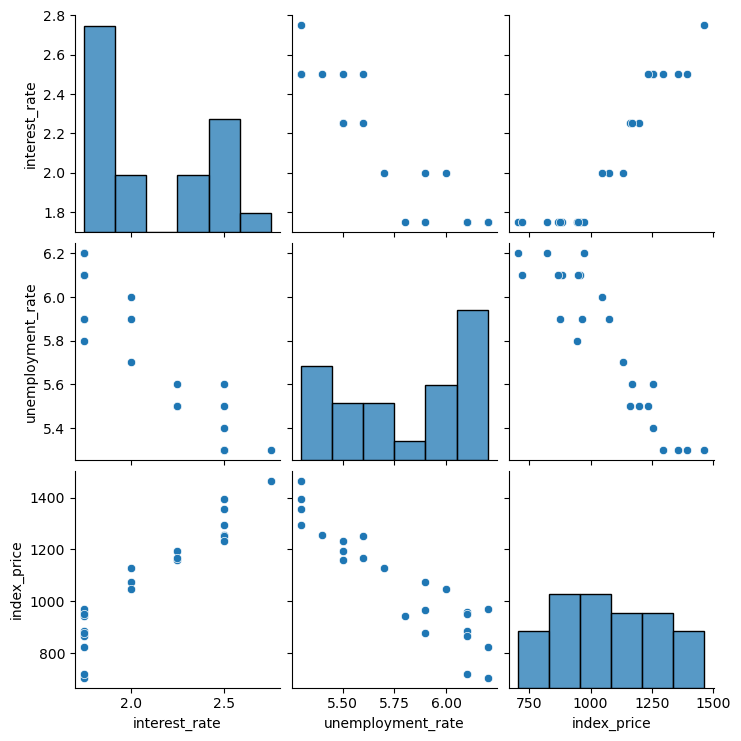

In [78]:
## Lets do some viualization
sns.pairplot(df)
plt.show()

<Axes: >

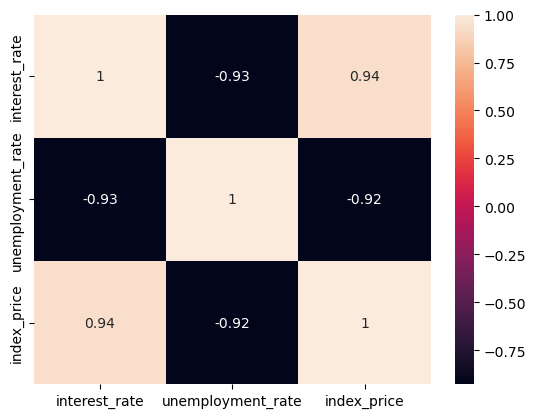

In [79]:
sns.heatmap(df.corr(), annot = True)

In [80]:
##independent and dependent features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [81]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [82]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

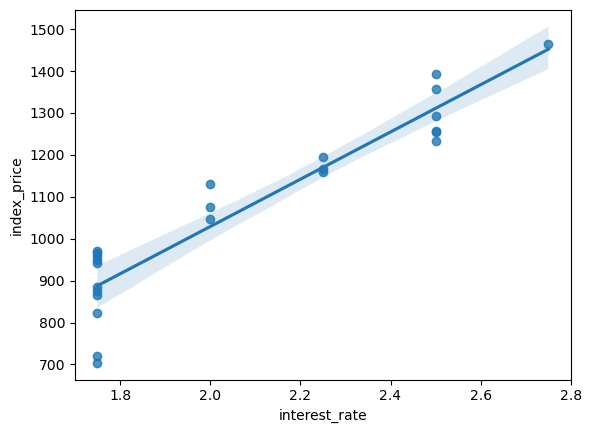

In [83]:
sns.regplot(x = df['interest_rate'],y = df['index_price'], scatter=True)
plt.show()


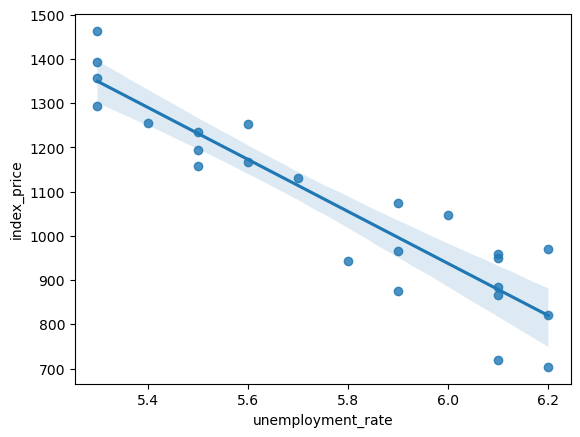

In [84]:
sns.regplot(x = df['unemployment_rate'],y = df['index_price'])
plt.show()

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

regression.fit(X_train, y_train)

LinearRegression()

In [87]:
print("Coefficient or slope :", regression.coef_)
print("Intercept :", regression.intercept_)

Coefficient or slope : [  88.27275507 -116.25716066]
Intercept : 1053.4444444444443


In [88]:
## cross validation
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(regression, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 3)

print(validation_score)
np.mean(validation_score)

[-4921.61331265 -7686.87497294 -5135.9962549 ]


-5914.828180162396

In [89]:
y_pred = regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [90]:
## Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)



5793.76288771258
59.93578152323556
76.11677139574813


In [91]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)

print(score)

#display adjusted R-squared
print(1 - (1 - score) * (len(y_test) - 1)/len(y_test) - X_test.shape[1] - 1)


0.8278978091457142
-2.1434184923785713


## __`Assumptions`__

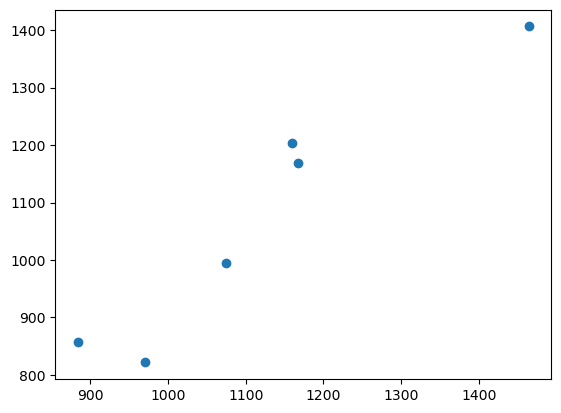

In [92]:
plt.scatter(y_test, y_pred)
plt.show()

In [93]:
residuals = (y_test - y_pred)
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


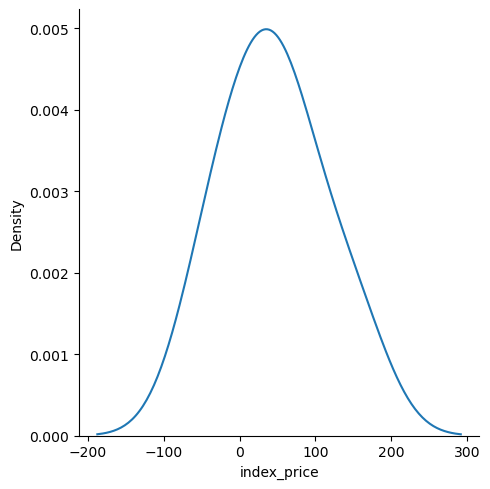

In [103]:
## Plot this residuals
sns.displot(residuals, kind = 'kde')
plt.show()

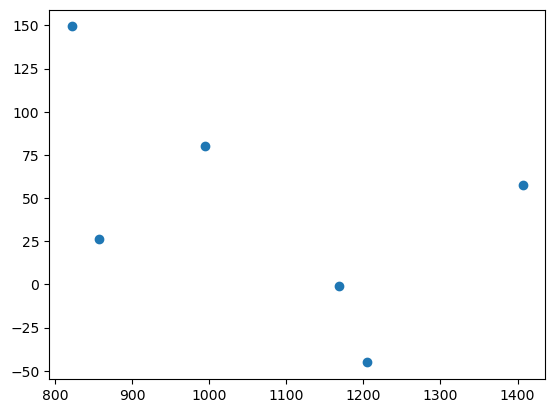

In [95]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)
plt.show()

## __`OLS Linear Regression`__

In [96]:
import statsmodels.api as sm 
model = sm.OLS(y_train, X_train).fit()

In [97]:
model.summary()

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 28 Aug 2025   Prob (F-statistic):                       0.754
Time:                        12:15:35   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""